## Indentification of all the members of the group.
Name: Lucas Moreira Santos (9345064)

Name: Luis Gustavo Bitencourt Almeida (9298207)

## Name of the dataset
Dataset: Bike Sharing

## Motivation to choose this dataset
Rational for choosing this dataset: bike sharing became a new trend recently and we want to understand why that happened and how big it is.

## Abstract
Abstract of the dataset (describe the dataset with your own words): this dataset includes bike sharing usage data, including datetime, weather, number of users and so on.

URL: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

## Questions to the dataset
Question 1: study the correlation between weather and usage.

Question 2: study the correlation between holidays and usage.

## EDA
EDA strategy:

1. Load and filter our data, selecting only relevant columns to our analysis.
2. Explore and try different data visualization methods.
3. Define what columns to correlate, and define their correlation.
4. Analyze the chosen correlations and study their change over time.

## Some examples of analysis/visualizations:

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

4) Is there any outlier's pattern? 

Yes, the usage is lower on Christmas, regardless of the weather.

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

6) Is there any symmetry that can be stressed?

We have not found any relevant symmetry.

7) How important was EDA to help you understand the dataset?

Without filtering data and relevant columns would not be possible to see any outlier pattern or get insights of when users ride bikes. With the proper visualization methods we could figure out the best holidays to bike sharing companies.

# Load and filter data

In [61]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import scatter_matrix

df_day  = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

In [62]:
print (df_day.info())
df_day.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [63]:
print (df_hour.info())
df_hour.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

# Simple statistics
(mean, variance, min, max)

In [64]:
df_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [65]:
df_hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

# Raw correlations

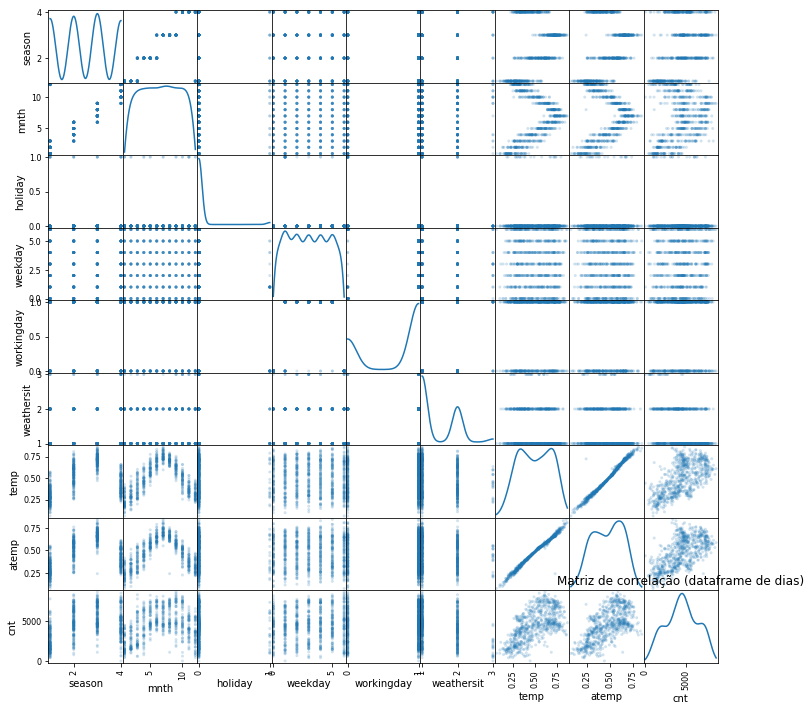

In [66]:
scatter_matrix(df_day[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'cnt']], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.title("Matriz de correlação (dataframe de dias)")
plt.show()

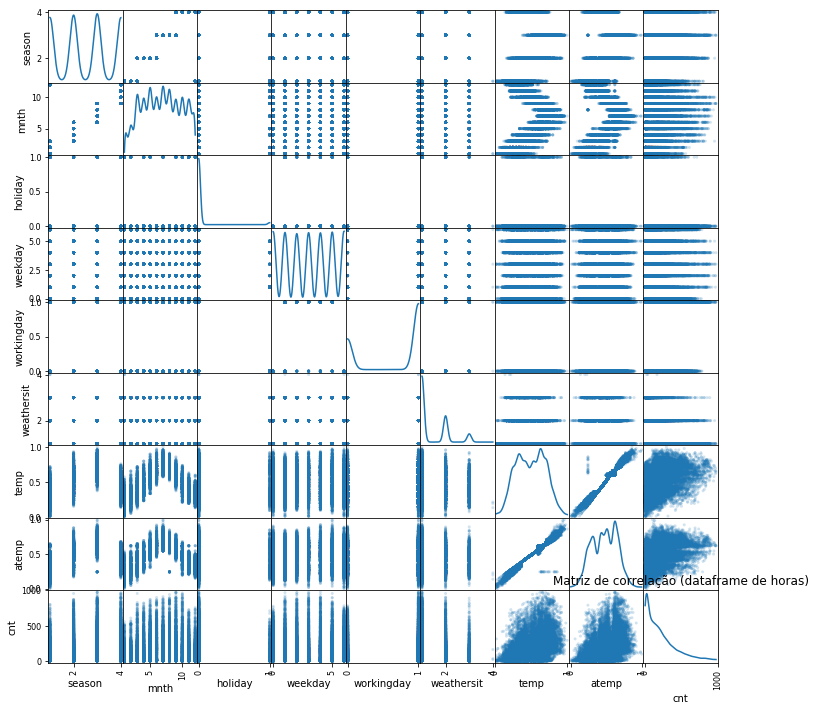

In [67]:
scatter_matrix(df_hour[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'cnt']], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.title("Matriz de correlação (dataframe de horas)")
plt.show()

# Analyzing usage per day
(day of week, growth over time, on holidays)

In [68]:
# Prepare data
df_day['dteday'] = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in df_day['dteday']]
df_day = df_day.sort_values('dteday', ascending=True)

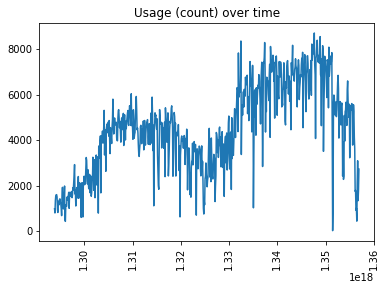

In [69]:
plt.plot(df_day['dteday'], df_day['cnt'])
plt.xticks(rotation='vertical')
plt.title("Usage (count) over time")
plt.show()

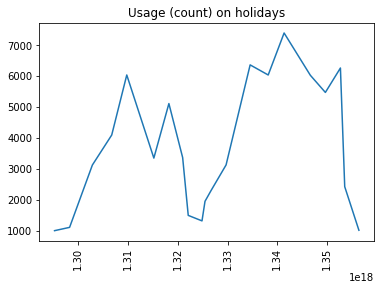

In [70]:
plt.plot(df_day[df_day['holiday'] == True]['dteday'], df_day[df_day['holiday'] == True]['cnt'])
plt.xticks(rotation='vertical')
plt.title("Usage (count) on holidays")
plt.show()

In [71]:
print ("Top 5 most used days")
df_day.sort_values('cnt', ascending=False).head()

Top 5 most used days


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
623      624 2012-09-15       3   1     9        0        6           0   
637      638 2012-09-29       4   1     9        0        6           0   
630      631 2012-09-22       3   1     9        0        6           0   
447      448 2012-03-23       2   1     3        0        5           1   
504      505 2012-05-19       2   1     5        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
623           1  0.608333  0.585867  0.501667   0.247521    3160        5554   
637           1  0.542500  0.530296  0.542917   0.227604    2589        5966   
630           1  0.650000  0.610488  0.646667   0.283583    2512        5883   
447           2  0.601667  0.570067  0.694167   0.116300    2469        5893   
504           1  0.600000  0.566908  0.456250   0.083975    3410        4884   

      cnt  
623  8714  
637  8555  
630  8395  
447  8362  
504  8294

In [72]:
print ("Top 5 most used holidays")
df_day[df_day['holiday'] == True].sort_values('cnt', ascending=False).head()

Top 5 most used holidays


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
550      551 2012-07-04       3   1     7        1        3           0   
471      472 2012-04-16       2   1     4        1        1           0   
681      682 2012-11-12       4   1    11        1        1           0   
184      185 2011-07-04       3   0     7        1        1           0   
513      514 2012-05-28       2   1     5        1        1           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
550           1  0.789167  0.732337  0.538750   0.134950    2562        4841   
471           1  0.664167  0.614925  0.561667   0.284829    1198        5172   
681           1  0.485000  0.475383  0.741667   0.173517    1097        5172   
184           2  0.726667  0.665417  0.637917   0.081479    3065        2978   
513           1  0.712500  0.679300  0.676250   0.196521    2557        3486   

      cnt  
550  7403  
471  6370  
681  6269  
184  6043  
513  6043

# Correlation weather and usage
Precisamos fazer a correlação desses dois caras.
Enfeita bastante. Isola as variaveis, compara temp com atemp (temp real x sensação termica), "desnormaliza" as temps/atemps pra ter uma noção das temps ótimas (olha o link do dataset q tem info de como fazer).

Acho que é legal usar a coluna weathersit tb.

# Best scenario for sharing a bike
Acha as melhores condições (temp, dia da semana, mês, ...) que teve os maiores usos de bike.

Motivação: insight de dados guiado por interesse de business (dps a gente revisa e coloca isso como pergunta que queríamos responder e motivação pra usar o dataset)

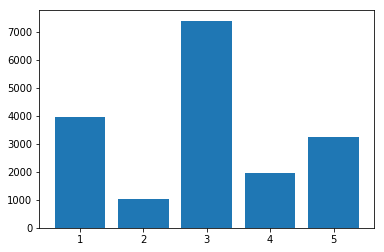

Holidays on Wednesday are especially good for bike sharing.


In [76]:
df_day_sorted = df_day[df_day['holiday'] == True].groupby('weekday')
x = [i for i in range(0, 5)]
for key, item in df_day_sorted:
    x[key-1] = df_day_sorted.get_group(key)['cnt'].mean()
    
plt.bar([i for i in range(1, 6)], x)
plt.show()

print("Holidays on Wednesday and Monday are especially good for bike sharing.")

In [75]:
print("Top 5 less used holidays")
df_day[df_day['holiday'] == True].sort_values('cnt', ascending=True).head()

Top 5 less used holidays


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
16        17 2011-01-17       1   0     1        1        1           0   
724      725 2012-12-25       1   1    12        1        2           0   
51        52 2011-02-21       1   0     2        1        1           0   
359      360 2011-12-26       1   0    12        1        1           0   
327      328 2011-11-24       4   0    11        1        4           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
16            2  0.175833  0.176771  0.537500   0.194017     117         883   
724           2  0.291304  0.294465  0.734783   0.168726     440         573   
51            2  0.303333  0.284075  0.605000   0.307846     195         912   
359           1  0.321739  0.315535  0.506957   0.239465     430         887   
327           1  0.373333  0.372471  0.549167   0.167304     560         935   

      cnt  
16   1000  
724  1013  
51   1107  
359  1317  
327  1495